In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re
from numpy.random import normal
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Telecom.csv')

In [2]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
df['churn'] = df['churn'].astype(int)

In [6]:
df['international plan'] = df['international plan'].replace(['no'],0)
df['international plan'] = df['international plan'].replace(['yes'],1)

In [7]:
df['voice mail plan'] = df['voice mail plan'].replace(['no'],0)
df['voice mail plan'] = df['voice mail plan'].replace(['yes'],1)

In [8]:
df['international plan'] = df['international plan'].astype(int)
df['voice mail plan'] = df['voice mail plan'].astype(int)

In [9]:
df.columns=df.columns.map(lambda x: x.replace('.','_').replace(' ','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')',''))

In [10]:
df.drop(columns=['state'], inplace = True)
df.drop(columns=['phone_number'], inplace = True)

In [11]:
outcome='churn'
cols=[col for col in df.columns]
cols.remove('churn')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     40.60
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.43e-129
Time:                        16:24:25   Log-Likelihood:                -917.28
No. Observations:                3333   AIC:                             1873.
Df Residuals:                    3314   BIC:                             1989.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4416      0.088     -5.012      0.000      -0.614      -0.269
account_length             0.0001      0.000      0.735      0.463      -0.000       0.000
area_code              -8.072e-05      0.000     -0.616      0.538      -0.000       0.000
international_plan         0.3023      0.019     16.070      0.000       0.265       0.339
voice_mail_plan           -0.1373      0.043     -3.216      0.001      -0.221      -0.054
number_vmail_messages      0.0020      0.001      1.415      0.157      -0.001       0.005
total_day_minutes          0.0342      0.329      0.104      0.917      -0.611       0.679
total_day_calls            0.0003      0.000      1.159      0.246      -0.000       0.001
total_day_charge          -0.1935      1.935     -0.100      0.920      -3.987       3.601
total_eve_minutes          0.0939      0.163      0.575      0.565      -0.226       0.414
total_eve_calls         8.013e-05      0.000      0.288      0.773      -0.000       0.001
total_eve_charge          -1.0973      1.922     -0.571      0.568      -4.866       2.672
total_night_minutes       -0.0375      0.087     -0.428      0.668      -0.209       0.134
total_night_calls       7.288e-05      0.000      0.257      0.797      -0.000       0.001
total_night_charge         0.8398      1.944      0.432      0.666      -2.972       4.652
total_intl_minutes        -0.3980      0.521     -0.763      0.445      -1.420       0.624
total_intl_calls          -0.0082      0.002     -3.646      0.000      -0.013      -0.004
total_intl_charge          1.5035      1.931      0.779      0.436      -2.282       5.289
customer_service_calls     0.0582      0.004     13.805      0.000       0.050       0.066
==============================================================================
Omnibus:                      820.813   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.571
Skew:                           1.499   Prob(JB):                         0.00
Kurtosis:                       4.616   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This linear regression attempt is insufficient. Surely, we can do better with a different algorithm.

In [12]:
df.drop(columns=['account_length'], inplace = True)
df.drop(columns=['area_code'], inplace = True)

In [13]:
# Create dummy variables
relevant_columns = ['international_plan','voice_mail_plan','number_vmail_messages',
                    'total_day_minutes','total_day_calls','total_day_charge',
                    'total_eve_minutes','total_eve_calls','total_eve_charge',
                   'total_night_minutes','total_night_calls','total_night_charge',
                   'total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls','churn']
df_logistic = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

df_logistic.shape

(3333, 17)

In [14]:
# Drop missing rows
df_logistic = df_logistic.dropna()
df_logistic.shape

(3333, 17)

In [15]:
df_logistic.head(3)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [16]:
df_logistic_pairs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_logistic_pairs['Pairs'] = list(zip(df_logistic_pairs.level_0, df_logistic_pairs.level_1))
df_logistic_pairs.set_index(['Pairs'], inplace = True)
df_logistic_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_logistic_pairs.columns = ['Correlation']
df_logistic_pairs.drop_duplicates(inplace=True)
df_logistic_pairs[(df_logistic_pairs.Correlation>.65) & (df_logistic_pairs.Correlation<1)]

,Correlation
Pairs,
"(total_day_charge, total_day_minutes)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(number_vmail_messages, voice_mail_plan)",0.956927


In [17]:
#Perfect or near-perfect correlations here. Trying to get rid of multicollinearity.
df_logistic.drop(columns=['total_day_minutes'], inplace = True)
df_logistic.drop(columns=['total_eve_minutes'], inplace = True)
df_logistic.drop(columns=['total_night_minutes'], inplace = True)
df_logistic.drop(columns=['total_intl_minutes'], inplace = True)
df_logistic.drop(columns=['number_vmail_messages'], inplace = True)

In [18]:
y = df_logistic['churn']
X = df_logistic.drop(columns=['churn'], axis=1)

In [19]:
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.324624
         Iterations 7


In [20]:
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.324624
         Iterations 7


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3321
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.2155
Time:                        16:24:26   Log-Likelihood:                -1082.0
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                2.266e-120
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.5299      0.708    -12.044      0.000      -9.918      -7.142
international_plan         2.0423      0.145     14.064      0.000       1.758       2.327
voice_mail_plan           -0.9382      0.145     -6.474      0.000      -1.222      -0.654
total_day_calls            0.0033      0.003      1.187      0.235      -0.002       0.009
total_day_charge           0.0763      0.006     11.986      0.000       0.064       0.089
total_eve_calls            0.0011      0.003      0.381      0.703      -0.004       0.006
total_eve_charge           0.0849      0.013      6.322      0.000       0.059       0.111
total_night_calls          0.0004      0.003      0.154      0.877      -0.005       0.006
total_night_charge         0.0809      0.025      3.283      0.001       0.033       0.129
total_intl_calls          -0.0909      0.025     -3.645      0.000      -0.140      -0.042
total_intl_charge          0.3229      0.075      4.281      0.000       0.175       0.471
customer_service_calls     0.5143      0.039     13.125      0.000       0.438       0.591
==========================================================================================
"""

In [22]:
y = df_logistic['churn']
X = df_logistic.drop(columns=['churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [24]:
#Accuracy calculation function
def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

In [25]:
#Recall calculation function
def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / (tp + fn)

In [26]:
#Precision calculation function
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

In [27]:
#F1 calculation function
def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [28]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)
print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))

Training Accuracy:  0.8543417366946778
Testing Accuracy:  0.8657074340527577


In [29]:
print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))

Training Recall:  0.17391304347826086
Testing Recall:  0.16521739130434782


In [30]:
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))

Training Precision:  0.5161290322580645
Testing Precision:  0.5428571428571428


In [31]:
print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training F1-Score:  0.2601626016260163
Testing F1-Score:  0.2533333333333333


In [32]:
def confusion_matrix(y_true, y_prediction):
    counter = {'True Positive': 0, 'True Negative': 0, 'False Positive': 0, 'False Negative': 0}
    for ind, label in enumerate(y_true):
        prediction = y_prediction[ind]
        if label==1:
            if label==prediction:
                counter['True Positive']+=1
            else:
                counter['False Negative']+=1
        else:
            if label == prediction:
                counter['True Negative']+=1
            else:
                counter['False Positive']+=1
    return counter
confusion_matrix(y_test, y_hat_test)

{'True Positive': 19,
 'True Negative': 703,
 'False Positive': 16,
 'False Negative': 96}

In [33]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 {'True Positive': 19, 'True Negative': 703, 'False Positive': 16, 'False Negative': 96}


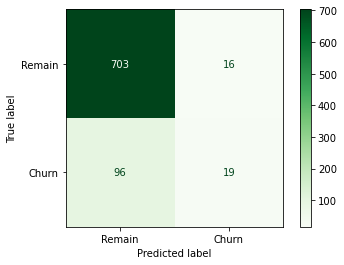

In [34]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Greens, display_labels=['Remain', 'Churn'])
plt.show()

In [35]:
def performance_results(trainx, trainy, train_prediction, testx, testy, test_prediction, model):  
    
    print("\n")
    
    print("Train Score Results")
    print(classification_report(trainy, train_prediction))       
    print(f'Train Set Accuracy: {accuracy_score(trainy, train_prediction):.4f}')
    print(f'Train Set Recall: {recall_score(trainy, train_prediction):.4f}')
    print(f'Train Set Precision: {precision_score(trainy, train_prediction):.4f}')
    print(f'Train Set F1-Score: {f1_score(trainy, train_prediction):.4f}')

    print("\n")
    
    print("Test Score Results")    
    print(classification_report(testy, test_prediction))       
    print(f'Test Set Accuracy: {accuracy_score(testy, test_prediction):.4f}')
    print(f'Test Set Recall: {recall_score(testy, test_prediction):.4f}')
    print(f'Test Set Precision: {precision_score(testy, test_prediction):.4f}')
    print(f'Test Set F1-Score: {f1_score(testy, test_prediction):.4f}')
    
    print("\n")
    print("Test Set Confusion Matrix")
    plot_confusion_matrix(model, testx, testy, cmap=plt.cm.Blues)

In [36]:
df_logistic['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [37]:
y = df_logistic['churn']
X = df_logistic.drop(columns=['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2131
1     368
Name: churn, dtype: int64
0    719
1    115
Name: churn, dtype: int64


AUC: 0.7627381024369595


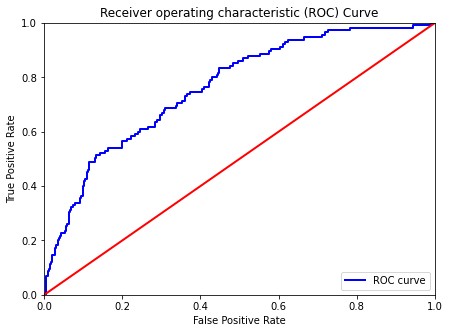

In [39]:
logreg=LogisticRegression(fit_intercept=False)
y_score=logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds=roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

LogisticRegression(C=0.0001, fit_intercept=False, solver='liblinear')
AUC for 0.0001: 0.5655923081574651


LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.6269093547801898


LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.7630888311060048


LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
AUC for 1000: 0.7640926407449959




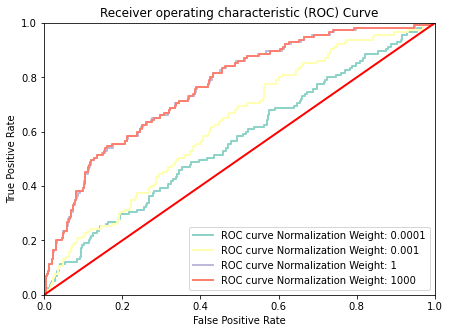

In [40]:
C_param_range = [0.0001, .001, 1, 1000]
names = [0.0001, .001, 1, 1000]
colors = sns.color_palette('Set3')
plt.figure(figsize=(7, 5))
for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    print(model_log)
    y_hat_test=logreg.predict(X_test)
    y_score=logreg.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('\n')
    lw=2
    plt.plot(fpr, tpr, color=colors[n],
             lw=2, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
print('Before:')
print(y_train.value_counts()) 
print('\n')

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

print('After:')
print(pd.Series(y_train_resampled).value_counts()) 

Before:
0    2131
1     368
Name: churn, dtype: int64


After:
1    2131
0    2131
Name: churn, dtype: int64


LogisticRegression(C=0.0001, fit_intercept=False, solver='liblinear')
AUC for 0.0001: 0.6287960331378123


LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.6894599987905907


LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.763802382536131


LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
AUC for 1000: 0.7641772993892483




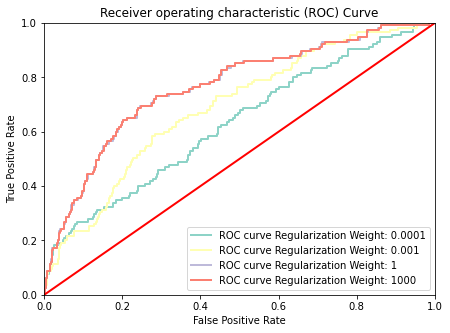

In [42]:
C_param_range = [0.0001, 0.001, 1, 1000]
names = [0.0001, 0.001, 1, 1000]
colors = sns.color_palette('Set3', n_colors=len(names))
plt.figure(figsize=(7, 5))
for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)
    y_hat_test = logreg.predict(X_test)
    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('\n')
    lw=2
    plt.plot(fpr, tpr, color=colors[n],
             lw=2, label='ROC curve Regularization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)
print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))

Training Accuracy:  0.6782713085234093
Testing Accuracy:  0.684652278177458


In [44]:
print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))

Training Recall:  0.7282608695652174
Testing Recall:  0.7391304347826086


In [45]:
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))

Training Precision:  0.2757201646090535
Testing Precision:  0.2672955974842767


In [46]:
print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training F1-Score:  0.39999999999999997
Testing F1-Score:  0.3926096997690531


In [47]:
def confusion_matrix(y_true, y_prediction):
    counter = {'True Positive': 0, 'True Negative': 0, 'False Positive': 0, 'False Negative': 0}
    for ind, label in enumerate(y_true):
        prediction = y_prediction[ind]
        if label==1:
            if label==prediction:
                counter['True Positive']+=1
            else:
                counter['False Negative']+=1
        else:
            if label == prediction:
                counter['True Negative']+=1
            else:
                counter['False Positive']+=1
    return counter
confusion_matrix(y_test, y_hat_test)

{'True Positive': 85,
 'True Negative': 486,
 'False Positive': 233,
 'False Negative': 30}

In [48]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 {'True Positive': 85, 'True Negative': 486, 'False Positive': 233, 'False Negative': 30}


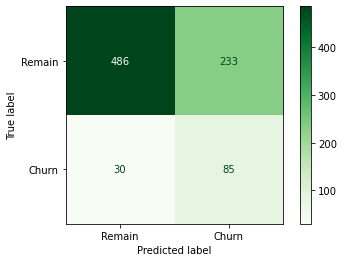

In [49]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Greens, display_labels=['Remain', 'Churn'])
plt.show()

Let's review how our logistic regression's results looked before balancing our classes with SMOTE.

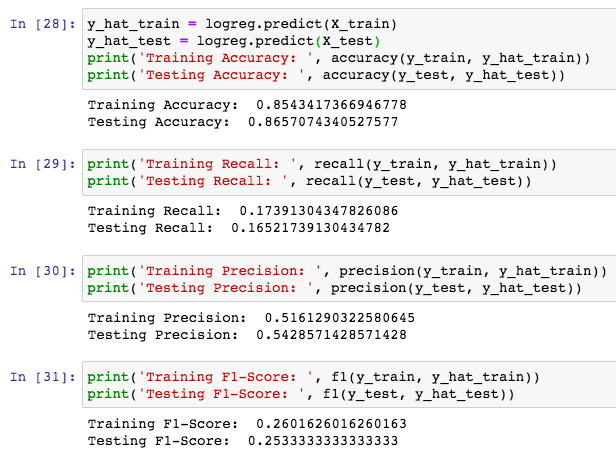

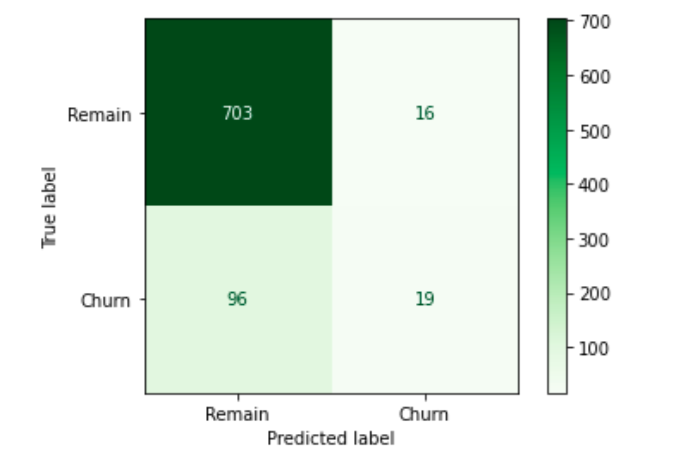

Since those initial results, our accuracy dropped from .85 to .68. Before the class balance, our model correctly identified whether or not a customer would remain with SyriaTel 85% of the time, but now, it only predicts the correct outcome 68% of the time.

As for our recall, that improved dramatically since our SMOTE usage, going from .17 to .73. Recall is calculated by dividing the number of true positives by the number of actual total positives. For out most recent model, 84/(84+31), or .73.

The precision decreased after the class balance, from .52 to .26. Precision is calculated by using the amount of true positives divided by the number of predicted positives. In other words, for our more recent model, we are looking for the amount of customers who discontinued services with SyriaTel out of all customers our model believed to churn. This is 84/(84+235), which is not a good rate. 

The F1 increased from .26 to just under .40. This metric is calculated as 2 * Recall * Precision/(Recall+Precision). As a result, the F1 score cannot be high without both precision and recall both being high. So, the F1 score is a good measure of a model's all-around reliability. While this metric improved significantly, it is not as high as we would like it to be. Let's try other algorithms.

In [50]:
knn_df=pd.read_csv('Telecom.csv')

In [51]:
knn_df.columns=knn_df.columns.map(lambda x: x.replace('.','_').replace(' ','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')',''))

In [52]:
#Earlier, we determined these columns to be unnecessary.
knn_df.drop(columns=['state'], inplace = True)
knn_df.drop(columns=['phone_number'], inplace = True)
knn_df.drop(columns=['account_length'], inplace = True)
knn_df.drop(columns=['area_code'], inplace = True)

In [53]:
knn_df.head(3)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [54]:
knn_df['churn']=knn_df['churn'].replace(['False'],0)
knn_df['churn']=knn_df['churn'].replace(['True'],1)
knn_df['international_plan']=knn_df['international_plan'].replace(['no'],0)
knn_df['international_plan']=knn_df['international_plan'].replace(['yes'],1)
knn_df['voice_mail_plan']=knn_df['voice_mail_plan'].replace(['no'],0)
knn_df['voice_mail_plan']=knn_df['voice_mail_plan'].replace(['yes'],1)
knn_df['churn']=knn_df['churn'].astype(int)
knn_df['international_plan']=knn_df['international_plan'].astype(int)
knn_df['voice_mail_plan']=knn_df['voice_mail_plan'].astype(int)

In [55]:
knn_df.isna().sum()

international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [56]:
one_hot_knn_df=pd.get_dummies(knn_df)
one_hot_knn_df.head(3)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [57]:
labels=one_hot_knn_df['churn']
one_hot_knn_df.drop('churn', axis=1, inplace=True)

In [58]:
X_train, X_test, y_train, y_test=train_test_split(one_hot_knn_df, labels, test_size=0.25, random_state=42)

In [59]:
#We will need to perform scaling.
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_knn_df.columns)
scaled_df_train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,-0.327448,-0.611418,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,1.069609,0.004940,1.071757,2.768109,-0.595235,2.767357,-0.427903
1,-0.327448,-0.611418,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,2.214376,0.670832,2.212569,1.051970,-1.417963,1.045965,0.324616
2,-0.327448,1.635543,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,-0.077125,-0.763398,-0.077797,-0.056369,0.227493,-0.053077,1.829653
3,-0.327448,-0.611418,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,-0.322994,-0.660953,-0.322569,-0.056369,-0.183871,-0.053077,-0.427903
4,-0.327448,-0.611418,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,-1.186487,0.056162,-1.188013,0.837453,1.050221,0.834102,1.077134


In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(scaled_data_train, y_train)
test_preds = clf.predict(scaled_data_test)

In [103]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=100):
    best_k=0
    best_score=0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k=k
            best_score=f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [104]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 3
F1-Score: 0.5473684210526316


Reinstantiate a model with k=3; the numbers ahead may be incorrect because it is using k=5.

In [105]:
def four_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
four_metrics(y_test, test_preds)

Accuracy Score: 0.8920863309352518
Recall Score: 0.36
Precision Score: 0.8181818181818182
F1 Score: 0.5


In [106]:
def confusion_matrix(y_true, y_pred):
    cm = {'True Positive': 0, 'True Negative': 0, 'False Positive': 0, 'False Negative': 0}
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            if label == pred:
                cm['True Positive'] += 1
            else:
                cm['False Negative'] += 1
        else:
            if label == pred:
                cm['True Negative'] += 1
            else:
                cm['False Positive'] += 1
    return cm
confusion_matrix(y_test, y_hat_test)

{'True Positive': 52,
 'True Negative': 443,
 'False Positive': 266,
 'False Negative': 73}

In [107]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
#Use a built-in method since hard-coded ones like this are prone to error.

Confusion Matrix:
 {'True Positive': 52, 'True Negative': 443, 'False Positive': 266, 'False Negative': 73}


In [108]:
round((53+444)/(51+444+265+72),3)
#The .892 accuracy metric does not match up with our results.

0.597

In [109]:
round(53/(53+72),3)
#The .360 recall metric does not match up with our results.

0.424

In [110]:
round(53/(53+265),3)
#The .818 precision metric does not match up with our results.

0.167

In [111]:
round(2*.8181818*.36/(.8181818+.36),3)
#Checking KNN model metrics. The .500 F1 score looks correct.

0.5

In [112]:
y_hat_train = knn.predict(X_train)
y_hat_test = knn.predict(X_test)
print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))

Training Accuracy:  0.24409763905562226
Testing Accuracy:  0.2529976019184652


In [113]:
def performance_results(trainx, trainy, train_prediction, testx, testy, test_prediction, model):  
    
    print("\n")
    
    print("Train Score Results")
    print(classification_report(trainy, train_prediction))       
    print(f'Train Set Accuracy: {accuracy_score(trainy, train_prediction):.4f}')
    print(f'Train Set Recall: {recall_score(trainy, train_prediction):.4f}')
    print(f'Train Set Precision: {precision_score(trainy, train_prediction):.4f}')
    print(f'Train Set F1-Score: {f1_score(trainy, train_prediction):.4f}')

    print("\n")
    
    print("Test Score Results")    
    print(classification_report(testy, test_prediction))       
    print(f'Test Set Accuracy: {accuracy_score(testy, test_prediction):.4f}')
    print(f'Test Set Recall: {recall_score(testy, test_prediction):.4f}')
    print(f'Test Set Precision: {precision_score(testy, test_prediction):.4f}')
    print(f'Test Set F1-Score: {f1_score(testy, test_prediction):.4f}')
    
    print("\n")
    print("Test Set Confusion Matrix")
    plot_confusion_matrix(model, testx, testy, cmap=plt.cm.Blues)



Train Score Results
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2141
           1       0.54      0.56      0.55       358

    accuracy                           0.87      2499
   macro avg       0.73      0.74      0.74      2499
weighted avg       0.87      0.87      0.87      2499

Train Set Accuracy: 0.8683
Train Set Recall: 0.5559
Train Set Precision: 0.5393
Train Set F1-Score: 0.5475


Test Score Results
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       709
           1       0.51      0.46      0.49       125

    accuracy                           0.85       834
   macro avg       0.71      0.69      0.70       834
weighted avg       0.85      0.85      0.85       834

Test Set Accuracy: 0.8525
Test Set Recall: 0.4640
Test Set Precision: 0.5088
Test Set F1-Score: 0.4854


Test Set Confusion Matrix


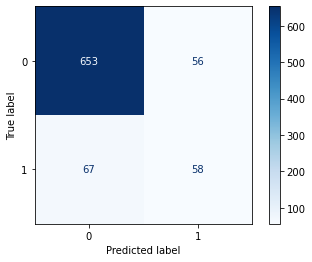

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, mean_squared_error, mean_absolute_error, classification_report,precision_score, recall_score, accuracy_score, f1_score

bayes = GaussianNB()

bayes.fit(X_train, y_train)
GaussianNB()

#Predict the model, evaluate results
test_preds = bayes.predict(X_test)
train_preds = bayes.predict(X_train)
performance_results(X_train, y_train, train_preds, X_test, y_test, test_preds, bayes)

In [73]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
decisiontree = DecisionTreeClassifier(random_state=10)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [74]:
#predict the train and test data
y_preds = decisiontree.predict(X_test)
y_preds2 = decisiontree.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Train Set Accuracy: 1.0000
Train Set Recall: 1.0000
Train Set Precision: 1.0000
Train Set F1-Score: 1.0000


Test Score Results
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       709
           1       0.69      0.77      0.73       125

    accuracy                           0.91       834
   macro avg       0.82      0.85      0.84       834
weighted avg       0.92      0.91      0.92       834

Test Set Accuracy: 0.9137
Test Set Recall: 0.7680
Test Set Precision: 0.6906
Test Set F1-Score: 0.7273


Test Set Confusion Matrix


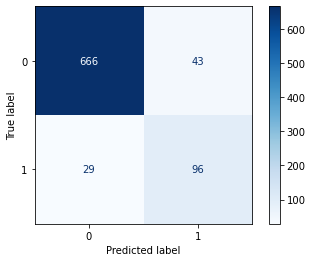

In [75]:
performance_results(X_train, y_train, y_preds2, X_test, y_test, y_preds, decisiontree)

In [76]:
#Retry the classifier with Entropy

decisiontree2 = DecisionTreeClassifier(criterion='entropy', random_state=35)
decisiontree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=35)

In [77]:
#predict the train and test data
y_ent_preds = decisiontree2.predict(X_test)
y_ent_preds2 = decisiontree2.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Train Set Accuracy: 1.0000
Train Set Recall: 1.0000
Train Set Precision: 1.0000
Train Set F1-Score: 1.0000


Test Score Results
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       709
           1       0.74      0.70      0.72       125

    accuracy                           0.92       834
   macro avg       0.85      0.83      0.84       834
weighted avg       0.92      0.92      0.92       834

Test Set Accuracy: 0.9185
Test Set Recall: 0.6960
Test Set Precision: 0.7436
Test Set F1-Score: 0.7190


Test Set Confusion Matrix


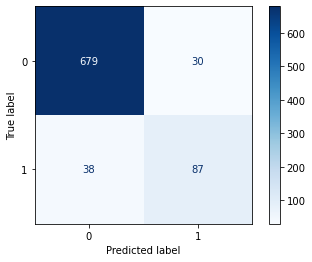

In [78]:
#Evaluate the results 
performance_results(X_train, y_train, y_ent_preds2, X_test, y_test, y_ent_preds, decisiontree2)

In [79]:
#Tune the max_depth hyperparameter to see if it improves results 
decisiontree3 = DecisionTreeClassifier(random_state=10, criterion="entropy", max_depth=3)
decisiontree3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [80]:
#predict the train and test data
y_testpreds = decisiontree3.predict(X_test)
y_trainpreds = decisiontree3.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2141
           1       0.66      0.50      0.57       358

    accuracy                           0.89      2499
   macro avg       0.79      0.73      0.75      2499
weighted avg       0.88      0.89      0.88      2499

Train Set Accuracy: 0.8912
Train Set Recall: 0.5028
Train Set Precision: 0.6569
Train Set F1-Score: 0.5696


Test Score Results
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       709
           1       0.67      0.49      0.56       125

    accuracy                           0.89       834
   macro avg       0.79      0.72      0.75       834
weighted avg       0.88      0.89      0.88       834

Test Set Accuracy: 0.8873
Test Set Recall: 0.4880
Test Set Precision: 0.6703
Test Set F1-Score: 0.5648


Test Set Confusion Matrix


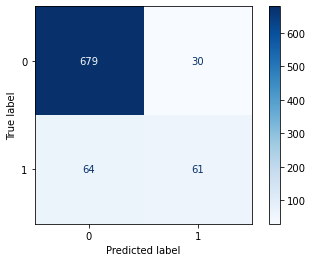

In [81]:
#Evaluate the results 
performance_results(X_train, y_train, y_trainpreds, X_test, y_test, y_testpreds, decisiontree3)

In [99]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(decisiontree3, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [83]:
#Instansiate and fit the model, choose a few hyperparameters to run through 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=50)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=50)

In [84]:
#make predictions
baggedpreds_train = bagged_tree.predict(X_train)
baggedpreds_test = bagged_tree.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2141
           1       0.97      0.75      0.84       358

    accuracy                           0.96      2499
   macro avg       0.96      0.87      0.91      2499
weighted avg       0.96      0.96      0.96      2499

Train Set Accuracy: 0.9604
Train Set Recall: 0.7486
Train Set Precision: 0.9675
Train Set F1-Score: 0.8441


Test Score Results
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       709
           1       0.91      0.70      0.79       125

    accuracy                           0.94       834
   macro avg       0.93      0.84      0.88       834
weighted avg       0.94      0.94      0.94       834

Test Set Accuracy: 0.9436
Test Set Recall: 0.6960
Test Set Precision: 0.9062
Test Set F1-Score: 0.7873


Test Set Confusion Matrix


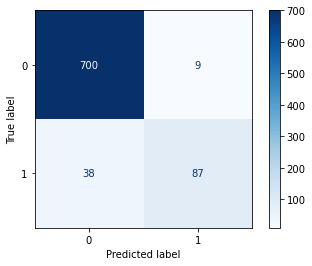

In [85]:
performance_results(X_train, y_train, baggedpreds_train, X_test, y_test, baggedpreds_test, bagged_tree)

In [86]:
#instansiate the model, choose some hyperparameters to run through, then fit 
randomforest = RandomForestClassifier(max_depth=5, criterion='gini', n_estimators=5, max_features=5)
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=5)

In [87]:
#Make predictions on the model
rftrain = randomforest.predict(X_train)
rftest = randomforest.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2141
           1       0.99      0.53      0.69       358

    accuracy                           0.93      2499
   macro avg       0.96      0.77      0.83      2499
weighted avg       0.94      0.93      0.92      2499

Train Set Accuracy: 0.9324
Train Set Recall: 0.5307
Train Set Precision: 0.9948
Train Set F1-Score: 0.6922


Test Score Results
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       709
           1       0.92      0.43      0.59       125

    accuracy                           0.91       834
   macro avg       0.91      0.71      0.77       834
weighted avg       0.91      0.91      0.89       834

Test Set Accuracy: 0.9089
Test Set Recall: 0.4320
Test Set Precision: 0.9153
Test Set F1-Score: 0.5870


Test Set Confusion Matrix


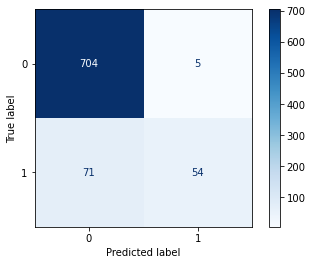

In [88]:
performance_results(X_train, y_train, rftrain, X_test, y_test, rftest, randomforest)

In [89]:
# Create graph that shows the feature importances per tree 
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

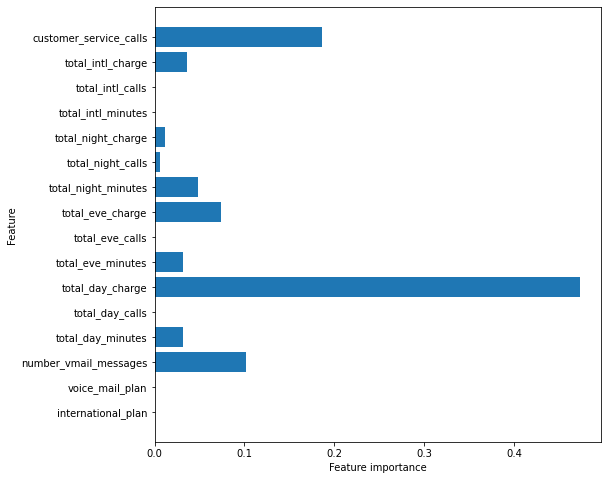

In [90]:
#Look at feature importances of first tree 
rf_tree1 = randomforest.estimators_[0]
plot_feature_importances(rf_tree1)

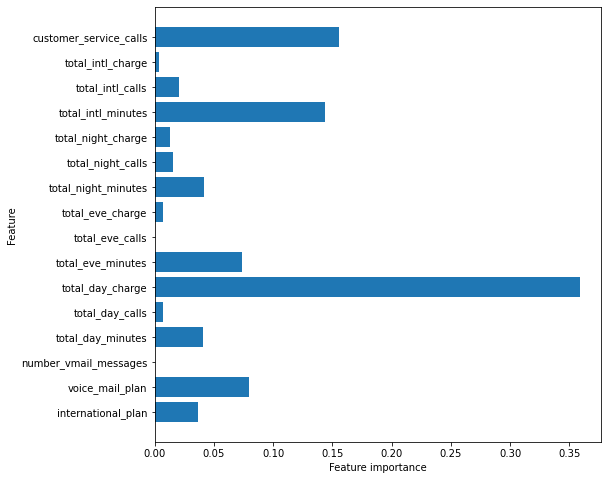

In [91]:
#Compare this feature importance to second tree 
rf_tree2 = randomforest.estimators_[1]
plot_feature_importances(rf_tree2)

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Look at GridSearch to improve the Random Tree model 
rfc = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rfc, X_train, y_train, cv=3))
round(mean_rf_cv_score, 3)

0.954

This model an excellent cross-validation score of about 95.4%. It will be difficult to improve this.

In [93]:
#Instansiate and fit the model
adb = AdaBoostClassifier(random_state=50)
adb.fit(X_train, y_train)

AdaBoostClassifier(random_state=50)

In [94]:
#Predict the model
adb_train = adb.predict(X_train)
adb_test = adb.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2141
           1       0.73      0.45      0.55       358

    accuracy                           0.90      2499
   macro avg       0.82      0.71      0.75      2499
weighted avg       0.89      0.90      0.89      2499

Train Set Accuracy: 0.8972
Train Set Recall: 0.4469
Train Set Precision: 0.7306
Train Set F1-Score: 0.5546


Test Score Results
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       709
           1       0.62      0.30      0.41       125

    accuracy                           0.87       834
   macro avg       0.76      0.64      0.67       834
weighted avg       0.85      0.87      0.85       834

Test Set Accuracy: 0.8681
Test Set Recall: 0.3040
Test Set Precision: 0.6230
Test Set F1-Score: 0.4086


Test Set Confusion Matrix


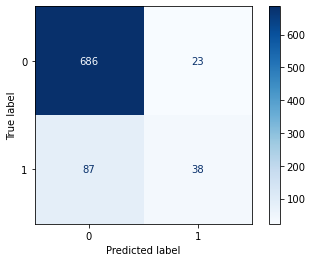

In [95]:
#Evaluate the results
performance_results(X_train, y_train, adb_train, X_test, y_test, adb_test, adb)

In [96]:
#Look at another performance measure: mean 3-Fold cross validation score 
adb_mean_cv = cross_val_score(adb, X, y, cv=3).mean()

print(f"Mean Adaboost Cross-Val Score (k=3): {adb_mean_cv: .2%}")

Mean Adaboost Cross-Val Score (k=3):  87.76%


Cross-Val: Consistent across different subsets of data, more reliable, not overfitting to any particular part.

Questions from Slack ... Interpretation of cross-validation score? k meaning? For KNN, best value of k and how to use? ... Getting images to appear?

Unique inclusions: Explain confusion matrices, be consistent with the metrics I'm using, straight-forward/easy to hit min reqs, need to explain all the steps clearly. Use the same function across all the models.

Download notebook extensions for table of contents, as it is getting a bit long.

# Have a space between # and text